In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

data = pd.read_csv("E:\\MyCodes\\HeadBrain\\headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

m=len(x)

numer = 0
denom = 0
for i in range(m):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y-(b1*mean_x)

print(b1,b0)

0.26342933948939945 325.57342104944223


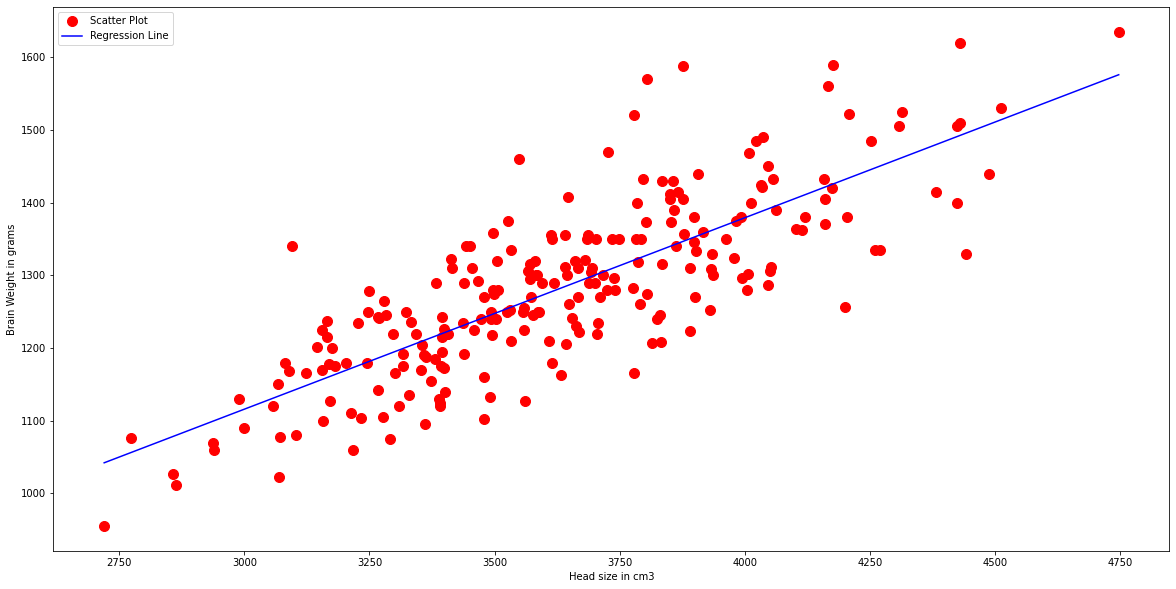

In [14]:
x_max=np.max(x)
x_min=np.min(x)
head_size=np.arange(x_min,x_max+1,x_max-x_min)
brain_weight=b1*head_size+b0
plt.plot(x,y,'ro',markersize=10,label='Scatter Plot')
plt.plot(head_size,brain_weight,'b',markersize=10,label='Regression Line')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.plot()
plt.show()

In [15]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0+b1*x[i]
    ss_t += (y[i]-mean_y)**2
    ss_r += (y[i]- y_pred)**2
r2= 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=x.reshape((m,1))
reg = LinearRegression()
reg=reg.fit(x,y)
y_pred = reg.predict(x)

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(x,y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
